In [1]:
# Data cleaning and EDA modules

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
# from sklearn.tree import export_graphviz  


# Estimation model modules

import statsmodels.api as sm


# Model validation modules

from sklearn.model_selection import train_test_split


# model metrics modules

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_error 

#Pipeline and grid search modules

print('finished importing modules')

finished importing modules


In [2]:
df = pd.read_csv('../../timmy-data/loans_cleaned.csv')

In [3]:
df.columns

Index(['loan_id', 'status', 'posted_time', 'raised_time', 'loan_amount',
       'activity_name', 'sector_name', 'country_name', 'lender_term',
       'repayment_interval', 'borrower_genders', 'time_to_fund',
       'hours_to_fund', 'loan_year', 'day_posted', 'image_incl', 'video_incl'],
      dtype='object')

#### 'loan_id', 'status', 'posted_time', 'raised_time', 'loan_amount', 'activity_name', 'sector_name', 'country_name', 'lender_term',        'repayment_interval', 'borrower_genders', 'time_to_fund', 'hours_to_fund', 'loan_year', 'day_posted', 'image_incl', 'video_incl'

In [4]:
df.shape

(1824788, 17)

In [5]:
df.isnull().sum()

loan_id               0
status                0
posted_time           0
raised_time           0
loan_amount           0
activity_name         0
sector_name           0
country_name          0
lender_term           0
repayment_interval    0
borrower_genders      0
time_to_fund          0
hours_to_fund         0
loan_year             0
day_posted            0
image_incl            0
video_incl            0
dtype: int64

### Dummify categorical variables - activity, country, and gender

In [6]:
df = pd.get_dummies(columns=["activity_name"], drop_first=True, data=df)
df = pd.get_dummies(columns=["country_name"], drop_first=True, data=df)
df = pd.get_dummies(columns=['borrower_genders'], drop_first=True, data=df)

### Drop non-productive columns and advance new effective dataframe

In [7]:
df_1=df.drop(columns=['loan_id', 'status', 'posted_time', 'raised_time', 'sector_name', 'lender_term', 'repayment_interval', 'time_to_fund',  'day_posted', 'image_incl', 'video_incl']).copy()

In [8]:
df_1.isnull().sum()

loan_amount                       0
hours_to_fund                     0
loan_year                         0
activity_name_Agriculture         0
activity_name_Air Conditioning    0
                                 ..
country_name_Yemen                0
country_name_Zambia               0
country_name_Zimbabwe             0
borrower_genders_G                0
borrower_genders_M                0
Length: 254, dtype: int64

In [9]:
# Write output file that contains list of features
features=df_1.columns
features
feature_cypher=df_1.isnull().sum()
feature_cypher.to_excel("feature_cypher.xlsx") 

### Produce files comprising yearly data files and all loan transactions based on loan amount threshhold

### Identify loan threshhold

In [10]:
loan_threshhold=1000

In [11]:
df_2015=df_1[df_1.loan_year==2015 & (df_1.loan_amount<=loan_threshhold)]
df_2016=df_1[df_1.loan_year==2016 & (df_1.loan_amount<=loan_threshhold)]
df_2017=df_1[df_1.loan_year==2017 & (df_1.loan_amount<=loan_threshhold)]
df_2018=df_1[df_1.loan_year==2018 & (df_1.loan_amount<=loan_threshhold)]
df_2019=df_1[(df_1.loan_year>=2019) & (df_1.loan_amount<=loan_threshhold)]
df_all=df_1[df_1.loan_amount<=loan_threshhold]

In [12]:
df_2019.columns

Index(['loan_amount', 'hours_to_fund', 'loan_year',
       'activity_name_Agriculture', 'activity_name_Air Conditioning',
       'activity_name_Animal Sales', 'activity_name_Aquaculture',
       'activity_name_Arts', 'activity_name_Auto Repair',
       'activity_name_Bakery',
       ...
       'country_name_Turkey', 'country_name_Uganda', 'country_name_Ukraine',
       'country_name_United States', 'country_name_Vietnam',
       'country_name_Yemen', 'country_name_Zambia', 'country_name_Zimbabwe',
       'borrower_genders_G', 'borrower_genders_M'],
      dtype='object', length=254)

In [13]:
df_2019.isnull().sum() 

loan_amount                       0
hours_to_fund                     0
loan_year                         0
activity_name_Agriculture         0
activity_name_Air Conditioning    0
                                 ..
country_name_Yemen                0
country_name_Zambia               0
country_name_Zimbabwe             0
borrower_genders_G                0
borrower_genders_M                0
Length: 254, dtype: int64

In [14]:
# df_2=df_1.drop(columns=['hours_to_fund', 'country_name', 'borrower_genders']).copy()   #master
# df_2=df_1.drop(columns=['hours_to_fund', 'country_name']).copy()                    # when gender is dummified
# df_2=df_1.drop(columns=['hours_to_fund', 'borrower_genders']).copy()              # when country_name is dummified
df_2=df_1.drop(columns=['hours_to_fund', 'loan_year']).copy()                    # when gender and country are  dummified
features = df_2.columns;
features;

In [15]:
features

Index(['loan_amount', 'activity_name_Agriculture',
       'activity_name_Air Conditioning', 'activity_name_Animal Sales',
       'activity_name_Aquaculture', 'activity_name_Arts',
       'activity_name_Auto Repair', 'activity_name_Bakery',
       'activity_name_Balut-Making', 'activity_name_Barber Shop',
       ...
       'country_name_Turkey', 'country_name_Uganda', 'country_name_Ukraine',
       'country_name_United States', 'country_name_Vietnam',
       'country_name_Yemen', 'country_name_Zambia', 'country_name_Zimbabwe',
       'borrower_genders_G', 'borrower_genders_M'],
      dtype='object', length=252)

### Identify time period

In [16]:
df=df_all

Text(0, 0.5, 'HTF')

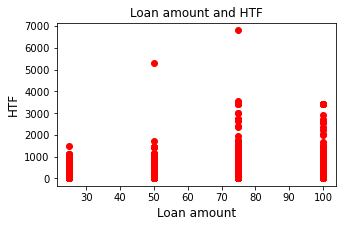

In [17]:
# # scatter plot for original data 
plt.figure(figsize = (5, 3))
plt.title('Loan amount and HTF')
plt.scatter(df['loan_amount'], df['hours_to_fund'], color = 'red')
plt.xlabel('Loan amount', fontsize=12)
plt.ylabel('HTF', fontsize=12)

#### Configure Poisson GLM

In [18]:
X = df[features]
X = sm.add_constant(X)  # Adds a y-intercept

# Set up y.
y = df['hours_to_fund']

X.columns;

In [19]:
# Fit model.
glm_poi = sm.GLM(y, X, family=sm.families.Poisson(link = sm.families.links.log())).fit()

# In statsmodels, y is the first argument.
# In statsmodels, X is the second argument.

1573814053.500266 60450 26034.971935488273 161.35356189278338
1.0


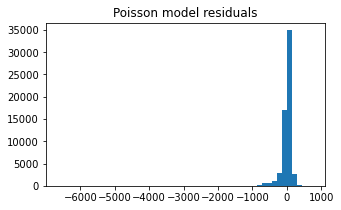

In [20]:
y_preds=glm_poi.predict(X)
resids=y_preds-y

SSE = np.square(resids).sum()
denom=np.square(resids).count()
MSE = SSE/denom
RMSE = np.sqrt(MSE)

print(SSE, denom, MSE, RMSE)


# glm_poi.scale
print(np.sqrt(glm_poi.scale))


plt.figure(figsize = (5, 3))
plt.title('Poisson model residuals')
plt.hist(resids, bins=50);

Text(0, 0.5, 'Residuals')

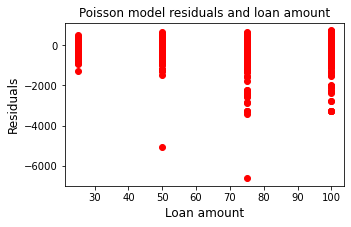

In [21]:
# # scatter plot for original data 
plt.figure(figsize = (5, 3))
plt.title('Poisson model residuals and loan amount')
plt.scatter(X['loan_amount'], resids, color = 'red')
plt.xlabel('Loan amount', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

In [22]:
# Generate summary of model.
glm_poi.summary()

C:\Users\pozzo\anacondav3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\pozzo\anacondav3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          hours_to_fund   No. Observations:                60450
Model:                            GLM   Df Residuals:                    60237
Model Family:                 Poisson   Df Model:                          212
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.7362e+06
Date:                Thu, 12 Nov 2020   Deviance:                   7.1024e+06
Time:                        18:20:25   Pearson chi2:                 1.01e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                 5.6278      0.049    114.878      0.000       5.532       5.724
loan_amount                                          -0.0038   2.15e-05   -177.435      0.000      -0.004      -0.004
activity_name_Agriculture                             0.2548      0.004     61.824      0.000       0.247       0.263
activity_name_Air Conditioning                    -7.265e-15   6.09e-16    -11.932      0.000   -8.46e-15   -6.07e-15
activity_name_Animal Sales                            0.0219      0.009      2.546      0.011       0.005       0.039
activity_name_Aquaculture                            -0.2503      0.040     -6.284      0.000      -0.328      -0.172
activity_name_Arts                                    0.2430      0.010     23.775      0.000       0.223       0.263
activity_name_Auto Repair                            -0.0353      0.031     -1.129      0.259      -0.097       0.026
activity_name_Bakery                                  0.0476      0.010      4.627      0.000       0.027       0.068
activity_name_Balut-Making                           -0.6078      0.052    -11.582      0.000      -0.711      -0.505
activity_name_Barber Shop                             0.0288      0.019      1.491      0.136      -0.009       0.067
activity_name_Beauty Salon                            0.1057      0.006     17.139      0.000       0.094       0.118
activity_name_Beekeeping                             -0.5305      0.038    -13.821      0.000      -0.606      -0.455
activity_name_Beverages                               0.1050      0.008     12.434      0.000       0.088       0.122
activity_name_Bicycle Repair                          0.1173      0.034      3.426      0.001       0.050       0.184
activity_name_Bicycle Sales                           1.3640      0.044     30.771      0.000       1.277       1.451
activity_name_Blacksmith                              0.1546      0.034      4.495      0.000       0.087       0.222
activity_name_Bookbinding                            -0.5993      0.124     -4.824      0.000      -0.843      -0.356
activity_name_Bookstore                               0.3616      0.022     16.422      0.000       0.318       0.405
activity_name_Bricks                                  0.3663      0.013     27.387      0.000       0.340       0.393
activity_name_Butcher Shop                            0.0978      0.014      6.945      0.000       0.070       0.125
activity_name_Cafe                                    0.3815      0.012     31.039      0.000       0.357       0.406
activity_name_Call Center                             0.7624      0.032     23.859      0.000       0.700       0.825
activity_name_C